### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Getting the data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Hours vs Score

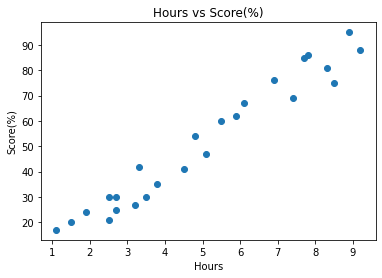

In [4]:
plt.scatter(data['Hours'],data['Scores'])
plt.title('Hours vs Score(%)')
plt.xlabel('Hours')
plt.ylabel('Score(%)')
plt.show()

### Preprocessing

In [5]:
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values

In [6]:
#Dividing data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
#Training our model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Plotting the Line of Regression

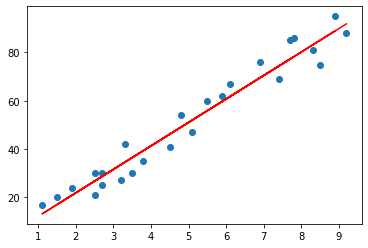

In [8]:
plt.plot(X_train,lm.predict(X_train),color='red')
plt.scatter(data['Hours'],data['Scores'])
plt.show()

### Predicting

In [9]:
predictions = lm.predict(X_test)

In [10]:
prediction_data = pd.DataFrame({'Actual Value':y_test, 'Predicted_value':predictions})
prediction_data

,Actual Value,Predicted_value
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


### Evaluation

In [11]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [12]:
print('R2 Score:',r2_score(y_test,predictions))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

R2 Score: 0.9553509219739938
MAE: 4.425394675156182
MSE: 23.51639603459522
RMSE: 4.849370684387328


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [13]:
hours = 9.25
score = lm.predict([[hours]])
print('Predicted Score for 9.25 hrs/day is:',score[0])

Predicted Score for 9.25 hrs/day is: 92.33571987331146
